# **Import packages**

In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline
import time
from dnn_app_utils_v3 import *

# **Read dataset**

In [5]:
import os
 
# Get the list of all files and directories
path = '../Images 2'
dir_list = os.listdir(path)

In [6]:
dir_list

['n02097658-silky_terrier',
 'n02092002-Scottish_deerhound',
 'n02099849-Chesapeake_Bay_retriever',
 'n02091244-Ibizan_hound',
 'n02095314-wire-haired_fox_terrier',
 'n02091831-Saluki',
 'n02102318-cocker_spaniel',
 'n02104365-schipperke',
 'n02090622-borzoi',
 'n02113023-Pembroke',
 'n02105505-komondor',
 'n02093256-Staffordshire_bullterrier',
 'n02113799-standard_poodle',
 'n02109961-Eskimo_dog',
 'n02089973-English_foxhound',
 'n02099601-golden_retriever',
 'n02095889-Sealyham_terrier',
 'n02085782-Japanese_spaniel',
 '.DS_Store',
 'n02097047-miniature_schnauzer',
 'n02110063-malamute',
 'n02105162-malinois',
 'n02086079-Pekinese',
 'n02097130-giant_schnauzer',
 'n02113978-Mexican_hairless',
 'n02107142-Doberman',
 'n02097209-standard_schnauzer',
 'n02115913-dhole',
 'n02106662-German_shepherd',
 'n02106382-Bouvier_des_Flandres',
 'n02110185-Siberian_husky',
 'n02094258-Norwich_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02109525-Saint_Bernard',
 'n0209375

In [4]:
import imageio as iio
import os
path = '../Images 2'
dir_list = os.listdir(path)
Dog_df = np.zeros((5000,64,64,3))
index = 0
flag = 0
from PIL import Image
for i in set(dir_list):
    if i != '.DS_Store':
        path = path + '/' + i
        images_name = os.listdir(path)
        for image_name in set(images_name):
            Im_path = path + '/' + image_name
            img = iio.imread(Im_path)
            img_pil = Image.fromarray(img)
            img_64_64 = np.array(img_pil.resize((64, 64), Image.ANTIALIAS))
            #print(img_64_64)
            #plt.imshow(img_64_64)
            
            Dog_df[index] = img_64_64.astype(int)
            index += 1
            if index == 5000:
                flag = 1
                break
    if flag == 1:
        break           
    path = '../Images 2'
Dog_df = Dog_df.astype(int) 
    

ValueError: could not broadcast input array from shape (64,64,4) into shape (64,64,3)

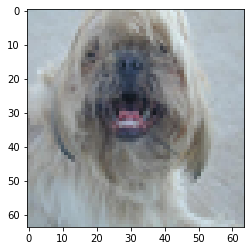

In [893]:
plt.imshow(Dog_df[490])

In [894]:
Non_dog_df = np.zeros((5000,64,64,3))
path = '/vegetable Images/train'
dir_list = os.listdir(path)
index = 0
flag = 0
from PIL import Image
for i in set(dir_list):
    print(i)
    if i != '.DS_Store':
        path = path + '/' + i
        images_name = os.listdir(path)
        for image_name in set(images_name):
            try:
                Im_path = path + '/' + image_name
                img = iio.imread(Im_path)
                img_pil = Image.fromarray(img)
                img_64_64 = np.array(img_pil.resize((64, 64), Image.ANTIALIAS))
                #print(img_64_64)
                #plt.imshow(img_64_64)
                Non_dog_df[index] = img_64_64.astype(int)
                index += 1
                if index == 5000:
                    flag = 1
                    break
            except (IOError,ValueError) as e:
                print('could not read the',image_name ,':',e,'hence skipping it.')
    if flag == 1:
        break           
    path = '/vegetable Images/train'
Non_dog_df = Non_dog_df.astype(int) 

Bean
CAT_02
could not read the .DS_Store : Could not find a format to read the specified file in single-image mode hence skipping it.
Bitter_Gourd
.DS_Store
Carrot
airport_inside
Cauliflower


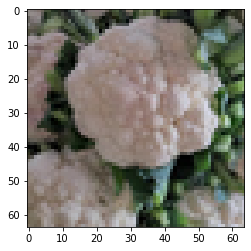

In [895]:
plt.imshow(Non_dog_df[-1])

In [896]:
import random
a = random.sample(range(0, 5000), 3000)
len(set(a))

3000

In [897]:
import random
a = random.sample(range(0, 5000), 3000)
b = np.ones(2000,)
index = 0
for value in range(0,5000):
    if value not in set(a):
        b[index] = int(value)
        index += 1
c = list(b.astype(int))
len(c)

2000

**Split the data into training set(60%), cross-validation set(20%), test set(20%)**

In [898]:
Non_dog_df[a,:]
Non_dog_df[c[0:1000],:]
Non_dog_df[c[1000:],:]

array([[[[ 17,  17,  12],
         [ 14,  14,  10],
         [ 12,  12,   4],
         ...,
         [ 76,  89,  66],
         [130, 144,  98],
         [141, 144, 105]],

        [[  9,  12,   4],
         [ 22,  24,  12],
         [ 58,  61,  41],
         ...,
         [150, 157, 125],
         [155, 170, 119],
         [131, 143, 113]],

        [[ 77,  85,  70],
         [103, 111,  89],
         [113, 120,  91],
         ...,
         [181, 183, 143],
         [152, 165, 116],
         [ 37,  52,  26]],

        ...,

        [[  0,   0,   0],
         [ 34,  34,  21],
         [122, 119, 102],
         ...,
         [ 50,  55,  26],
         [ 29,  44,   4],
         [152, 167, 129]],

        [[  1,   1,   3],
         [  2,   4,   1],
         [  2,   2,   1],
         ...,
         [ 51,  64,  22],
         [ 54,  75,  15],
         [111, 126,  68]],

        [[  2,   2,   2],
         [  2,   3,   4],
         [  0,   0,   6],
         ...,
         [ 39,  60,  16],
        

In [899]:
Training_X = np.concatenate((Dog_df[0:3000],Non_dog_df[a,:]),axis=0)
Cross_validation_X = np.concatenate((Dog_df[3000:4000],Non_dog_df[c[0:1000],:]),axis=0)
Test_X = np.concatenate((Dog_df[4000:],Non_dog_df[c[1000:],:]),axis=0)

In [900]:
train_set_y = np.concatenate((np.ones((1,3000)),np.zeros((1,3000))),axis=1)
validation_set_y = np.concatenate((np.ones((1,1000)),np.zeros((1,1000))),axis=1)
test_set_y = np.concatenate((np.ones((1,1000)),np.zeros((1,1000))),axis=1)

In [901]:
train_set_x_flatten = Training_X.reshape(Training_X.shape[0],-1).T
test_set_x_flatten = Test_X.reshape(Test_X.shape[0],-1).T
validate_x_flatten = Cross_validation_X.reshape(Cross_validation_X.shape[0],-1).T

In [902]:
train_set_y.shape

(1, 6000)




# A logistic regression model (no hidden layers).

# Normalization

In [903]:
train_set_x = train_set_x_flatten/255.
validate_set_x = validate_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [904]:
test_set_x.shape

(12288, 2000)

In [905]:

def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = .0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [906]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


In [907]:
# Helper function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [908]:
# Helper function
def L(yhat, y):
    loss = -(y*np.log(yhat)+(1-y)*np.log(1-yhat))
    return loss

In [909]:
# Helper function
def C(yhat, y):
    m = y.shape[1]
    cost = 1/m*np.sum(L(yhat, y))
    return cost

In [910]:

def propagate(w, b, X, Y):

    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(np.transpose(w),X)+b)                                 
    cost = C(A,Y)                               
    
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    Dw = 1/m*np.dot(X,np.transpose(A-Y))
    Db = 1/m*np.sum(A-Y)

    assert(Dw.shape == w.shape)
    assert(Db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"Dw": Dw,
             "Db": Db}
    
    return grads, cost

In [911]:

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        
        # Retrieve derivatives from grads
        Dw = grads["Dw"]
        Db = grads["Db"]
        
        # update rule 
        w = w-learning_rate*Dw
        b = b-learning_rate*Db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        if i == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
        # Print the cost every 100 training iterations
        if print_cost == True and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"Dw": Dw,
             "Db": Db}
    
    return params, grads, costs

In [912]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(np.transpose(w),X)+b) 
        
    for i in range(A.shape[1]): 
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        # or Y_predict[0,i] = np.where(A[0,i]>0.5,1,0)
        if A[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [913]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    # initialize parameters with zeros 
    w, b = np.zeros((X_train.shape[0],1)),0

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w,b,X_train)

    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [914]:
d = model(train_set_x, train_set_y, validate_set_x, validate_set_y, num_iterations = 5000, learning_rate = 0.005, print_cost = False)



Cost after iteration 0: 0.693147
train accuracy: 78.83333333333333 %
test accuracy: 66.35 %


In [916]:
# On validate dataset
d = model(train_set_x, train_set_y, validate_set_x, validation_set_y, num_iterations = 5000, learning_rate = 0.05, print_cost = False)


Cost after iteration 0: 0.693147


/var/folders/r2/szcgswfs0ss71fkn6dr8zn5m0000gn/T/ipykernel_5788/466909980.py:3: RuntimeWarning: divide by zero encountered in log
  loss = -(y*np.log(yhat)+(1-y)*np.log(1-yhat))
/var/folders/r2/szcgswfs0ss71fkn6dr8zn5m0000gn/T/ipykernel_5788/466909980.py:3: RuntimeWarning: invalid value encountered in multiply
  loss = -(y*np.log(yhat)+(1-y)*np.log(1-yhat))


train accuracy: 67.63333333333333 %
test accuracy: 64.80000000000001 %


In [918]:
# On validate dataset
d = model(train_set_x, train_set_y, validate_set_x, validation_set_y, num_iterations = 5000, learning_rate = 0.001, print_cost = False)


Cost after iteration 0: 0.693147
train accuracy: 76.4 %
test accuracy: 74.4 %


In [919]:
# On validate dataset
d = model(train_set_x, train_set_y, validate_set_x, validation_set_y, num_iterations = 5000, learning_rate = 0.0005, print_cost = False)


Cost after iteration 0: 0.693147
train accuracy: 74.23333333333333 %
test accuracy: 71.80000000000001 %


In [920]:
# On test dataset
# the best model
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 5000, learning_rate = 0.001, print_cost = False)


Cost after iteration 0: 0.693147
train accuracy: 76.4 %
test accuracy: 65.8 %


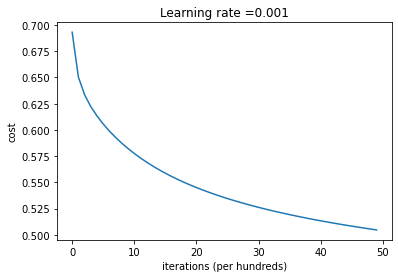

In [921]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

A Neural Network with one hidden layer and four hidden units. Use the ReLU activation
function for the hidden layer and use the sigmoid activation function for the outcome layer.

In [815]:
train_set_y.shape

(1, 6000)

In [922]:
def layer_sizes(X, Y):
    
    n_x = X.shape[0] # size of input layer
    n_h = 4 #manually set it as 4
    n_y = Y.shape[0] # size of output layer
    
    return (n_x, n_h, n_y)

In [923]:
def initialize_parameters(n_x, n_h, n_y):  
    np.random.seed(2) # we set up a seed so that your output matches my values although the initialization is random.
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [924]:
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267 -0.02136196 ... -0.01275513  0.00733372
   0.01166127]
 [ 0.00016076  0.00699494 -0.02144254 ... -0.00569705 -0.00276633
   0.0011016 ]
 [-0.00553107  0.00678748 -0.00870469 ...  0.00174631  0.00395599
  -0.00136441]
 [-0.00701089  0.00335768 -0.00122743 ...  0.01439597 -0.00733648
  -0.0040589 ]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01336063  0.00115223 -0.00207114  0.01109624]]
b2 = [[0.]]


In [925]:

def forward_propagation(X, parameters):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X)+b1
    #A1 = np.tanh(Z1)
    A1 = np.maximum(0,Z1)
    Z2 = np.dot(W2,A1)+b2
    #A2 = sigmoid(Z2)
    A2 = 1/(1+np.exp(-Z2))
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [926]:
def compute_cost(A2, Y, parameters):

    m = Y.shape[1] # number of example

    # Compute the cost
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),(1-Y))
    cost = -1/m*np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [927]:

def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2, corresponding to 6 equations on slide above
    dZ2 = A2-Y
    dW2 = 1/m*np.dot(dZ2,np.transpose(A1))
    db2 = 1/m*np.sum(dZ2)
    
    #dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    temp = np.maximum(0,A1)
    temp[temp<=0] = 0
    temp[temp>0] = 1
    dZ1 = np.dot(W2.T,dZ2)*temp
    
    dW1 = 1/m*np.dot(dZ1,np.transpose(X))
   
    db1 = 1/m*np.sum(dZ1,axis = 1,keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [945]:
def update_parameters(parameters, grads, learning_rate = 0.05):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameter
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [941]:

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
        
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)

        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [930]:
def predict(parameters, X):

    A2, cache = forward_propagation(X, parameters)
    predictions = np.where(A2>0.5,1,0)
    
    return predictions

In [931]:
#learning rate = 1
parameters = nn_model(train_set_x, train_set_y, n_h = 4, num_iterations = 10000, print_cost=True)

Cost after iteration 0: 0.693157
Cost after iteration 1000: 0.692847
Cost after iteration 2000: 0.693147
Cost after iteration 3000: 0.693147
Cost after iteration 4000: 0.693147
Cost after iteration 5000: 0.693147
Cost after iteration 6000: 0.693147
Cost after iteration 7000: 0.693147
Cost after iteration 8000: 0.693147
Cost after iteration 9000: 0.693147


In [933]:
predictions = predict(parameters, train_set_x)
print ('Training Accuracy: %d' % float((np.dot(train_set_y,predictions.T) + np.dot(1-train_set_y,1-predictions.T))/float(train_set_y.size)*100) + '%')
predictions = predict(parameters, validate_set_x)
print ('Validation Accuracy: %d' % float((np.dot(validation_set_y,predictions.T) + np.dot(1-validation_set_y,1-predictions.T))/float(validation_set_y.size)*100) + '%')


Training Accuracy: 50%
Validation Accuracy: 50%


In [946]:
#learning rate = 0.05 
# The best model
parameters = nn_model(train_set_x, train_set_y, n_h = 4, num_iterations = 2000, print_cost=True)

Cost after iteration 0: 0.693157
Cost after iteration 100: 0.669755
Cost after iteration 200: 0.630867
Cost after iteration 300: 0.585275
Cost after iteration 400: 0.583634
Cost after iteration 500: 0.553898
Cost after iteration 600: 0.627166
Cost after iteration 700: 0.533573
Cost after iteration 800: 0.578697
Cost after iteration 900: 0.499296
Cost after iteration 1000: 0.481579
Cost after iteration 1100: 0.556316
Cost after iteration 1200: 0.461722
Cost after iteration 1300: 0.515944
Cost after iteration 1400: 0.479851
Cost after iteration 1500: 0.485053
Cost after iteration 1600: 0.475376
Cost after iteration 1700: 0.473045
Cost after iteration 1800: 0.464840
Cost after iteration 1900: 0.459670


In [947]:
predictions = predict(parameters, train_set_x)
print ('Training Accuracy: %d' % float((np.dot(train_set_y,predictions.T) + np.dot(1-train_set_y,1-predictions.T))/float(train_set_y.size)*100) + '%')
predictions = predict(parameters, validate_set_x)
print ('Validation Accuracy: %d' % float((np.dot(validation_set_y,predictions.T) + np.dot(1-validation_set_y,1-predictions.T))/float(validation_set_y.size)*100) + '%')


Training Accuracy: 80%
Validation Accuracy: 75%


In [948]:
predictions = predict(parameters, train_set_x)
print ('Training Accuracy: %d' % float((np.dot(train_set_y,predictions.T) + np.dot(1-train_set_y,1-predictions.T))/float(train_set_y.size)*100) + '%')

predictions = predict(parameters, test_set_x)
print ('Testing Accuracy: %d' % float((np.dot(test_set_y,predictions.T) + np.dot(1-test_set_y,1-predictions.T))/float(test_set_y.size)*100) + '%')




Training Accuracy: 80%
Testing Accuracy: 68%


A Neural Network with two hidden layers. The first hidden layer with seven hidden units, and the second hidden layer with four hidden units. Use the ReLU activation function for
both hidden layers and use the sigmoid activation function for the outcome layer.

In [964]:
layers_dims = [12288, 7, 4, 1]

In [965]:
def initialize_parameters_deep(layer_dims):
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))

        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [966]:
def linear_forward(A, W, b):
    
    Z = np.dot(W,A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [967]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [968]:
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). 
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W'+str(l)], parameters['b'+str(l)], 'relu')
        caches.append(cache)                  # Add "cache" to the "caches" list
    
    # Implement LINEAR -> SIGMOID. 
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], 'sigmoid')
    caches.append(cache)                      # Add "cache" to the "caches" list
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [969]:
def compute_cost(AL, Y):
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = -1/m*np.sum(np.multiply(np.log(AL),Y) + np.multiply(np.log(1-AL),(1-Y)))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [970]:
def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dA_prev = np.dot(W.T,dZ)
    dW = 1/m*np.dot(dZ,A_prev.T)
    db = 1/m*np.sum(dZ,axis=1,keepdims=True)
    
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [971]:
def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [972]:
def L_model_backward(AL, Y, caches):
    
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = -(np.divide(Y,AL) - np.divide(1-Y,1-AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache,activation='sigmoid')

    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)],current_cache,activation='relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] =dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [973]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads['db' + str(l+1)]

    return parameters

In [974]:

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.691373
Cost after iteration 100: 0.664117
Cost after iteration 200: 0.646277
Cost after iteration 300: 0.634375
Cost after iteration 400: 0.625097
Cost after iteration 500: 0.617306
Cost after iteration 600: 0.610377
Cost after iteration 700: 0.604000
Cost after iteration 800: 0.598030
Cost after iteration 900: 0.592370
Cost after iteration 1000: 0.586946
Cost after iteration 1100: 0.581748
Cost after iteration 1200: 0.576751
Cost after iteration 1300: 0.571932
Cost after iteration 1400: 0.567286
Cost after iteration 1500: 0.562809
Cost after iteration 1600: 0.558504
Cost after iteration 1700: 0.554357
Cost after iteration 1800: 0.550359
Cost after iteration 1900: 0.546490
Cost after iteration 2000: 0.542750
Cost after iteration 2100: 0.539154
Cost after iteration 2200: 0.535688
Cost after iteration 2300: 0.532334
Cost after iteration 2400: 0.529107


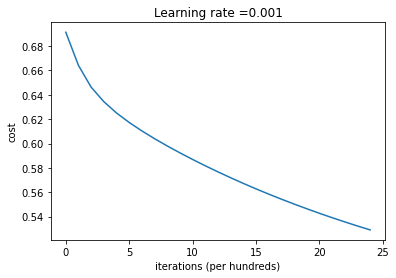

In [978]:
parameters = L_layer_model(train_set_x, train_set_y, layers_dims,learning_rate = 0.001, num_iterations = 2500, print_cost = True)



In [979]:
pred_train = predict(train_set_x, train_set_y, parameters)

Accuracy: 0.7431666666666668


In [980]:
pred_test = predict(validate_set_x, validation_set_y, parameters)

Accuracy: 0.7115000000000002


Cost after iteration 0: 0.691373
Cost after iteration 100: 0.626910
Cost after iteration 200: 0.607924
Cost after iteration 300: 0.593417
Cost after iteration 400: 0.581826
Cost after iteration 500: 0.570998
Cost after iteration 600: 0.561566
Cost after iteration 700: 0.553818
Cost after iteration 800: 0.545032
Cost after iteration 900: 0.537111
Cost after iteration 1000: 0.530538
Cost after iteration 1100: 0.524973
Cost after iteration 1200: 0.520356
Cost after iteration 1300: 0.514902
Cost after iteration 1400: 0.508743


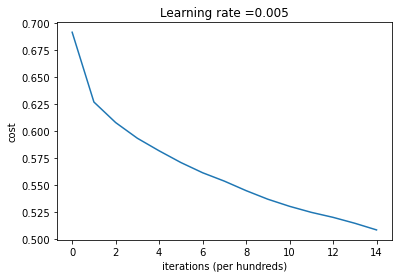

In [981]:
parameters = L_layer_model(train_set_x, train_set_y, layers_dims,learning_rate = 0.005, num_iterations = 1500, print_cost = True)


In [982]:
pred_train = predict(train_set_x, train_set_y, parameters)

Accuracy: 0.7413333333333335


In [983]:
pred_test = predict(validate_set_x, validation_set_y, parameters)

Accuracy: 0.7080000000000002


Cost after iteration 0: 0.691373
Cost after iteration 100: 0.620321
Cost after iteration 200: 0.587331
Cost after iteration 300: 0.559305
Cost after iteration 400: 0.534302
Cost after iteration 500: 0.516813
Cost after iteration 600: 0.478098
Cost after iteration 700: 0.465091
Cost after iteration 800: 0.456596
Cost after iteration 900: 0.457003
Cost after iteration 1000: 0.454774
Cost after iteration 1100: 0.528283
Cost after iteration 1200: 0.470452
Cost after iteration 1300: 0.564921
Cost after iteration 1400: 0.421342


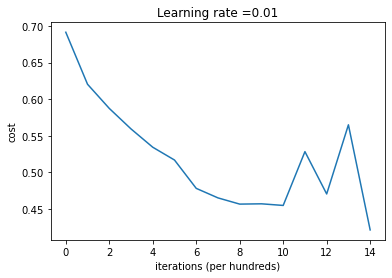

In [991]:
# The best model
parameters = L_layer_model(train_set_x, train_set_y, layers_dims,learning_rate = 0.01, num_iterations = 1500, print_cost = True)


In [992]:
pred_train = predict(train_set_x, train_set_y, parameters)

Accuracy: 0.8070000000000002


In [993]:
pred_test = predict(validate_set_x, validation_set_y, parameters)

Accuracy: 0.7685000000000002


In [994]:
# The best model
pred_test = predict(test_set_x, test_set_y, parameters)

Accuracy: 0.6960000000000002


Cost after iteration 0: 0.691373
Cost after iteration 100: 0.638050
Cost after iteration 200: 0.597458
Cost after iteration 300: 0.557397
Cost after iteration 400: 0.646534
Cost after iteration 500: 0.592589
Cost after iteration 600: 0.565946
Cost after iteration 700: 0.530075
Cost after iteration 800: 0.566752
Cost after iteration 900: 0.588587
Cost after iteration 1000: 0.567982
Cost after iteration 1100: 0.483131
Cost after iteration 1200: 0.557572
Cost after iteration 1300: 0.517339
Cost after iteration 1400: 0.575033
Cost after iteration 1500: 0.463382
Cost after iteration 1600: 0.501303
Cost after iteration 1700: 0.473371
Cost after iteration 1800: 0.444258
Cost after iteration 1900: 0.565720


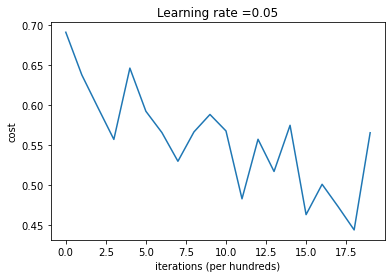

In [987]:
parameters = L_layer_model(train_set_x, train_set_y, layers_dims,learning_rate = 0.05, num_iterations = 1900, print_cost = True)


In [988]:
pred_train = predict(train_set_x, train_set_y, parameters)

Accuracy: 0.7240000000000002


In [989]:
pred_test = predict(validate_set_x, validation_set_y, parameters)

Accuracy: 0.7120000000000002


In [990]:
pred_test = predict(test_set_x, test_set_y, parameters)

Accuracy: 0.6570000000000001
